## Burnout Project
# Import


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

import pickle

## Import & Load Data

In [3]:
#Load Data
burnout_df = pd.read_csv('/Users/noor.hamid/Python/burnout-dataset/train.csv')

In [4]:
burnout_df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


# Transform discrete data variables into booleans

In [5]:
#Transform binary columns 

gender = burnout_df.loc[:, 'Gender'] = np.where(burnout_df.Gender=='Female', True, False)
company_type = burnout_df.loc[:, 'Company Type'] = np.where(burnout_df['Company Type']=='Service', True, False)
wfh_setup = burnout_df.loc[:, 'WFH Setup Available'] = np.where(burnout_df['WFH Setup Available']=='Yes', True, False)

In [6]:
burnout_df.insert(2, 'Is Female?', gender)
burnout_df.insert(3, 'Is Company Service?', company_type)
burnout_df.insert(4, 'Is WFH setup available?',wfh_setup)

In [7]:
burnout_df.head()

,Employee ID,Date of Joining,Is Female?,Is Company Service?,Is WFH setup available?,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,True,True,False,True,True,False,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,False,True,True,False,True,True,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,True,False,True,True,False,True,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,False,True,True,False,True,True,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,True,True,False,True,True,False,3.0,7.0,6.9,0.52


In [8]:
#drop existing columns and keep remaining transformed data
burnout_df = burnout_df.drop(['Gender','Company Type','WFH Setup Available','Employee ID','Date of Joining'],axis=1)

In [9]:
burnout_df

,Is Female?,Is Company Service?,Is WFH setup available?,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,True,True,False,2.0,3.0,3.8,0.16
1,False,True,True,1.0,2.0,5.0,0.36
2,True,False,True,2.0,NaN,5.8,0.49
3,False,True,True,1.0,1.0,2.6,0.20
4,True,True,False,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...
22745,True,True,False,1.0,3.0,NaN,0.41
22746,True,False,True,3.0,6.0,6.7,0.59
22747,False,True,True,3.0,7.0,NaN,0.72
22748,True,True,False,2.0,5.0,5.9,0.52


## Drop Nulls

In [11]:
burnout_df = burnout_df.dropna()

# Prepare Data for Model 

In [12]:
#seperate data
x = burnout_df.drop(['Burn Rate'], axis = 1)
y = burnout_df['Burn Rate']

In [13]:
#Split data into test/train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

In [14]:
y_test

17157    0.50
6899     0.16
17607    0.48
18855    0.29
10140    0.38
         ... 
18091    0.49
4353     0.56
2609     0.64
17208    0.48
22002    0.10
Name: Burn Rate, Length: 4648, dtype: float64

## Run Linear Regression Model on prepared data

In [15]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [35]:
y_pred = pd.Series(model.predict(x_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,0.50,0.528050
1,0.16,0.130285
2,0.48,0.425259
3,0.29,0.370148
4,0.38,0.443557


## Verify Model Selection via Quantitative Metrics

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [37]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.04601641841700729
0.0031684677745507173
0.9196767257772984


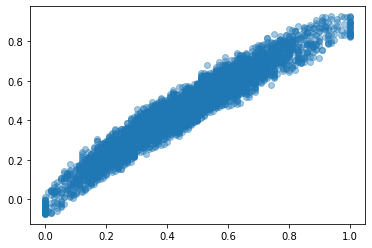

In [39]:
plt.scatter(y_test,y_pred, alpha = 0.4)